 # K_means 聚类算法

In [4]:
from numpy import *
def loadDataSet(filename):
    dataMat=[]
    with open(filename,'r') as f:
        lines=f.readlines()
        for line in lines:
            curline=line.strip().split('\t')
            fltLine=list(map(float,curline))
            dataMat.append(fltLine)
        return dataMat

In [12]:
dataMat=mat(loadDataSet('testSet.txt'))
dataMat

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926],
        [ 2.336445,  2.875106],
        [-1.786345,  2.554248],
        [ 2.190101, -1.90602 ],
        [-3.403367, -2.778288],
        [ 1.778124,  3.880832],
        [-1.688346,  2.230267],
        [ 2.592976, -2.054368],
        [-4.007257, -3.207066],
        [ 2.257734,  3.387564],
        [-2.679011,  0.785119],
        [ 0.939512, -4.023563],
        

In [9]:
def distEclud(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2)))
#生成最大值与最小值之间的数
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [13]:
randCent(dataMat,2)

matrix([[ 3.80441664, -0.23754842],
        [ 1.69653101, -0.40583024]])

In [15]:
distEclud(dataMat[0],dataMat[1])

5.184632816681332

In [17]:
# k_MEANS算法会创建k个质心，然后将每个点分配到最近的质心，重新计算质心
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [19]:
myCentroids, clustAssing = kMeans(dataMat, 4)

[[ 3.40697609  4.47989262]
 [-3.94828585  2.59397044]
 [-2.86961095  3.8432152 ]
 [ 2.33613657  4.52999062]]
[[ 3.48493595 -0.62303267]
 [-3.09539062 -2.26219085]
 [-2.18799937  3.01824781]
 [ 2.00090788  1.64428112]]
[[ 3.11052774 -2.61694289]
 [-3.19984738 -2.96423548]
 [-2.46154315  2.78737555]
 [ 2.4519287   3.02837225]]
[[ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]


In [20]:
import matplotlib
import matplotlib.pyplot as plt
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-3.24109513  1.70235875]
 [-3.31781127 -2.30638316]
 [ 0.55544564  3.90980657]
 [-2.50506184 -0.36074292]]
[[-2.768021    2.65028438]
 [-2.74312074 -3.05531939]
 [ 2.26956248  2.65844463]
 [ 2.70091921 -2.82615093]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]]


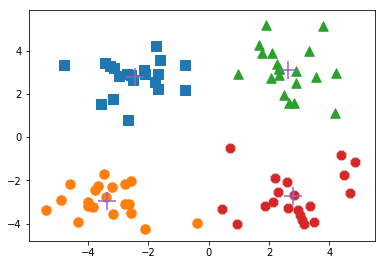

In [21]:
showPlt(dataMat)

In [22]:
# 二分 K——means
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

In [23]:
dataMat=mat(loadDataSet('testSet2.txt'))
centList,myNewAssments=biKmeans(dataMat,3)

[[-4.67340297  0.35986225]
 [ 1.90103912 -1.87560137]]
[[-2.8815949   3.10812271]
 [ 1.30897764  0.21151872]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
sseSplit, and notSplit:  570.722757425 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-2.94148471  2.73874082]
 [-3.2070967   2.61680536]]
[[-2.43131608  3.45250362]
 [-3.90577229  3.092145  ]]
[[-2.1459026  3.421808 ]
 [-3.7488489  3.2309482]]
[[-1.9062885   3.42271988]
 [-3.64143392  3.26215025]]
[[-1.76576557  3.39794014]
 [-3.58362738  3.28784469]]
sseSplit, and notSplit:  22.9717718963 532.659806789
[[ 0.82212346 -1.38427742]
 [-0.82286464  2.26602609]]
[[-0.14333495 -2.41561436]
 [ 2.92430661  3.34087561]]
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit:  68.6865481262 38.0629506357
the bestCentToSplit is:  1
the len of bestClustAss is:  40


In [30]:
# 对地图上的点进行聚类
import urllib
import json
def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooapis.com/geocode?'  #create a dict and constants for the goecoder
    params = {}
    params['flags'] = 'J'#JSON return type
    params['appid'] = 'aaa0VN6k'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params      #print url_params
    print(yahooApi)
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

from time import sleep
def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else: print("error fetching")
        sleep(1)
    fw.close()

In [37]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    print("ss",datMat)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

In [39]:
geoGrab('1 VA Center','Augusts,ME')

http://where.yahooapis.com/geocode?location=1+VA+Center+Augusts%2CME&appid=aaa0VN6k&flags=J


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

ss [[-122.788346   45.486502]
 [-122.781021   45.49315 ]
 [-122.766147   45.498187]
 [-122.800311   45.485943]
 [-122.781853   45.508203]
 [-122.779628   45.493398]
 [-122.376304   45.430319]
 [-122.425553   45.507621]
 [-122.618893   45.39907 ]
 [-122.634159   45.427072]
 [-122.638846   45.462173]
 [-122.646587   45.485396]
 [-122.699212   45.464826]
 [-122.842918   45.646831]
 [-122.48248    45.519142]
 [-122.675528   45.523094]
 [-122.674206   45.520682]
 [-122.720828   45.543016]
 [-122.593078   45.562715]
 [-122.56151    45.519052]
 [-122.675605   45.520561]
 [-122.682725   45.584124]
 [-122.608366   45.495365]
 [-122.524073   45.49775 ]
 [-122.499672   45.519142]
 [-122.611177   45.497498]
 [-122.66835    45.583048]
 [-122.571475   45.555384]
 [-122.574167   45.554263]
 [-122.578746   45.547229]
 [-122.589208   45.484823]
 [-122.62792    45.496918]
 [-122.674189   45.520714]
 [-122.538196   45.489637]
 [-122.57873    45.548651]
 [-122.523985   45.497765]
 [-122.600881   45.555811

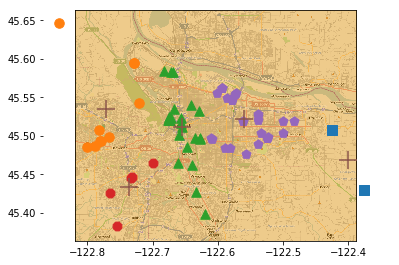

In [40]:
clusterClubs(5)